In [36]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
np.random.seed(1000)
def gen_sn(M, I):
    sn = np.random.standard_normal((M+1, I/2))
    sn = np.concatenate((sn, -sn), axis=1)
    sn = (sn - sn.mean()) / sn.std()
    return sn

In [49]:
def gbm_mcs_amer(K, option='call'):
    #Time step
    dt = T/M
    #discount factor
    df = np.exp(-r*dt)
    #Simulation of index level
    S = np.zeros((M+1, I))
    S[0] = S0
    sn = gen_sn(M,I)
    for t in range(1, M+1):
        S[t] = S[t-1] * np.exp((r-0.5*sigma**2) * dt + sigma*np.sqrt(dt)*sn[t])
    
    #Case base simulation payoff
    if option == 'call':
        h = np.maximum(S-K, 0)
    else:
        h = np.maximum(K-S, 0)
        
    #LSM algorithm
    V = np.copy(h)
    #Iterate from  M-1 to 0
    for t in range(M-1, 0, -1):
        #Least-square regression to estimate V[t+1]*df based on S[t], level 7 of the polynomial
        reg = np.polyfit(S[t], V[t+1]*df, 7)
        if t == 30:
            reg_acu = reg
        # For the coefficients obtained, evaluate reg*S[t] to obtain an expectaction of the continuation value C
        C = np.polyval(reg, S[t])
        #Compute for each time stamp t, the value of the american option, as the maximum between the expected continuation value
        # and the payoff h at t
        V[t] = np.where(C>h[t], V[t+1]*df, h[t])
        
    #MCS estimator
    C0 = df * 1/I * np.sum(V[1])
    return C0, V, h, sn, S, reg, C, reg_acu

In [50]:
M=50
I=50000
S0 = 100
r = 0.05
sigma = 0.25
T = 1

In [51]:
C0, V, h, sn, S, reg, C, reg_acu = gbm_mcs_amer(110., option='call')

In [66]:
S.shape

(51, 50000)

In [67]:
V.shape

(51, 50000)

In [30]:
S[-1]

array([ 110.22588432,  145.64239294,   94.23014365, ...,  162.06898209,
         78.75235688,   98.07755753])

In [31]:
h[-1]

array([  0.22588432,  35.64239294,   0.        , ...,  52.06898209,
         0.        ,   0.        ])

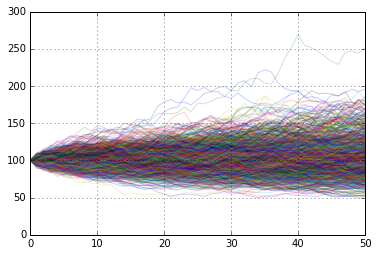

In [62]:
plt.plot(S[:, :1000], alpha=0.2);
plt.grid(True)

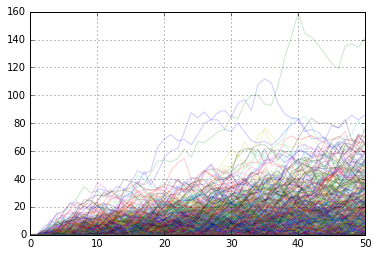

In [63]:
plt.plot(h[:, :1000], alpha=0.2)
plt.grid(True);

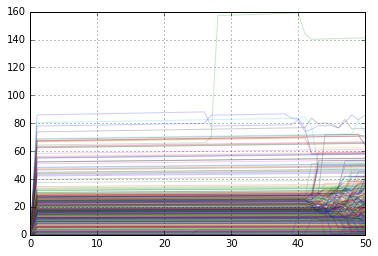

In [64]:
plt.plot(V[:, :1000], alpha=0.2);
plt.grid(True)

In [65]:
V.shape

(51, 50000)